In [1]:
import numpy as np
import scipy
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
import matplotlib.pyplot as plt


/Users/nataliecygan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()


[[238.02274171 235.58125352   2.99976578]
 [  6.         190.5          2.        ]
 [ 24.30769231 423.           2.        ]
 [ 36.         346.           2.        ]
 [ 41.5        102.5          2.        ]
 [ 44.83333333 373.83333333   2.        ]
 [ 51.         128.5          2.        ]
 [ 65.5        306.5          2.        ]
 [ 68.         306.           3.        ]
 [ 68.5         64.           2.        ]
 [ 68.         305.5          1.        ]
 [ 72.10526316  63.57894737   3.        ]
 [ 70.5        304.5          2.        ]
 [ 72.5         63.5          1.        ]
 [ 75.5        264.5          2.        ]
 [ 78.83333333  23.16666667   2.        ]
 [120.65625    277.46875      3.        ]
 [120.          36.           2.        ]
 [121.5        277.5          1.        ]
 [122.         447.           2.        ]
 [123.5         36.           1.        ]
 [123.5        273.5          2.        ]
 [128.34821429 447.04464286   2.58035714]
 [123.5        450.5          2.  

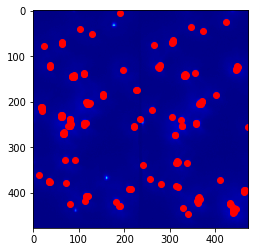

In [3]:
import numpy as np
import scipy
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
import matplotlib.pyplot as plt

fname = 'sample2.png'
neighborhood_size = 3
threshold = 50

data = scipy.misc.imread(fname)

data_max = filters.maximum_filter(data, neighborhood_size)


maxima = (data == data_max)
data_min = filters.minimum_filter(data, neighborhood_size)
diff = ((data_max - data_min) > threshold)
maxima[diff == 0] = 0

labeled, num_objects = ndimage.label(maxima)
xy = np.array(ndimage.center_of_mass(data, labeled, range(1, num_objects+1)))

print(xy)
plt.imshow(data)
plt.savefig('/tmp/data.png', bbox_inches = 'tight')

plt.autoscale(False)
plt.plot(xy[:, 1], xy[:, 0], 'ro')
plt.show()
#plt.savefig('/tmp/result.png', bbox_inches = 'tight')